In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from scipy.stats import ttest_rel, ttest_ind
from os import listdir, getcwd 

In [2]:
# load data for specific guild

date = '03_13_2023'
dir_AF1 = 'AF1'
dir_AF0 = 'AF0'
guild = 'pollinator'
allfiles_AF1 = listdir('%s/results/%s/%s/motifs/' % (getcwd(), date, dir_AF1))
allfiles_AF0 = listdir('%s/results/%s/%s/motifs/' % (getcwd(), date, dir_AF0))
motif_files_AF1 = [file for file in allfiles_AF1 if guild in file]
motif_files_AF0 = [file for file in allfiles_AF0 if guild in file]

In [3]:
# merge colonizers across all simulations within a group for motif analysis

# with adaptive foraging
species_af1 = pd.DataFrame()
for p in motif_files_AF1:
    p_AF1 = pd.read_csv('%s/results/%s/%s/motifs/%s' % (getcwd(), date, dir_AF1, p))
    p_AF1 = p_AF1.iloc[9:] #remove first 9 plants in each simulation
    species_af1 = species_af1.append(p_AF1)
species_af1.removed.apply(lambda x: 1000 if x == math.inf else x)
species_af1['lifespan'] = species_af1.removed - species_af1.added

# without adaptive foraging
species_af0 = pd.DataFrame()
for p in motif_files_AF0:
    p_AF0 = pd.read_csv('%s/results/%s/%s/motifs/%s' % (getcwd(), date, dir_AF0, p))
    p_AF0 = p_AF0.iloc[9:] #remove first 9 plants in each simulation
    species_af0 = species_af0.append(p_AF0)
species_af0.removed.apply(lambda x: 1000 if x == math.inf else x)
species_af0['lifespan'] = species_af0.removed - species_af0.added

In [4]:
# How frequently is each motif introduced?

#only consider species who have indirect partners
species_af1 = species_af1[species_af1.GenPart == 1]
species_af0 = species_af0[species_af0.GenPart == 1]

#separate between specialists and generalists
spc_af1 = species_af1[species_af1.Spc == 1]
spc_af0 = species_af0[species_af0.Spc == 1]
gen_af1 = species_af1[species_af1.Gen == 1]
gen_af0 = species_af0[species_af0.Gen == 1]

#separate between specialists with generalists partners with specialist and generalist partners
spc_spc_af1 = spc_af1[spc_af1.SpcPartPart == 1]
spc_spc_af0 = spc_af0[spc_af0.SpcPartPart == 1]
spc_gen_af1 = spc_af1[spc_af1.GenPartPart == 1]
spc_gen_af0 = spc_af0[spc_af0.GenPartPart == 1]
spc_gen_af1 = spc_gen_af1[spc_gen_af1.SpcPartPart == 0]
spc_gen_af0 = spc_gen_af0[spc_gen_af0.SpcPartPart == 0]

#separate between generalists with generalists partners with specialist and generalist partners
gen_spc_af1 = gen_af1[gen_af1.SpcPartPart == 1]
gen_spc_af0 = gen_af0[gen_af0.SpcPartPart == 1]
gen_gen_af1 = gen_af1[gen_af1.GenPartPart == 1]
gen_gen_af0 = gen_af0[gen_af0.GenPartPart == 1]
gen_gen_af1 = gen_gen_af1[gen_gen_af1.SpcPartPart == 0]
gen_gen_af0 = gen_gen_af0[gen_gen_af0.SpcPartPart == 0]

In [5]:
# Relative Establishment Table

data = pd.DataFrame(columns = ['Species_Guild', 'Assembly_Model', 'Motif_Group', 'Num_Colonizers', 'Est_Num', 'Est_Rate'])
data.Species_Guild = np.repeat(guild, 8)
data.Assembly_Model = np.concatenate((np.repeat('AF1', 4), np.repeat('AF0', 4)))
data.Motif_Group = ['Spc_Spc', 'Spc_Gen', 'Gen_Spc', 'Gen_Gen', 'Spc_Spc', 'Spc_Gen', 'Gen_Spc', 'Gen_Gen']
data.Num_Colonizers = [len(spc_spc_af1), len(spc_gen_af1), len(gen_spc_af1), len(gen_gen_af1), len(spc_spc_af0), len(spc_gen_af0), len(gen_spc_af0), len(gen_gen_af0)]
data.Est_Num = [sum(spc_spc_af1.lifespan > 4000), sum(spc_gen_af1.lifespan > 4000), sum(gen_spc_af1.lifespan > 4000), sum(gen_gen_af1.lifespan > 4000), sum(spc_spc_af0.lifespan > 4000), sum(spc_gen_af0.lifespan > 4000), sum(gen_spc_af0.lifespan > 4000), sum(gen_gen_af0.lifespan > 4000)]
data.Est_Rate = data.Est_Num / data.Num_Colonizers
print(data)

  Species_Guild Assembly_Model Motif_Group  Num_Colonizers  Est_Num  Est_Rate
0    pollinator            AF1     Spc_Spc            1251      488  0.390088
1    pollinator            AF1     Spc_Gen            6761     1689  0.249815
2    pollinator            AF1     Gen_Spc            3087     1142  0.369938
3    pollinator            AF1     Gen_Gen            5277     1597  0.302634
4    pollinator            AF0     Spc_Spc            1251      488  0.390088
5    pollinator            AF0     Spc_Gen            6761     1689  0.249815
6    pollinator            AF0     Gen_Spc            3087     1142  0.369938
7    pollinator            AF0     Gen_Gen            5277     1597  0.302634


In [6]:
# How frequent is each motif after establishment? 
est_species_af1 = species_af1[species_af1.lifespan > 4000]
est_species_af0 = species_af0[species_af0.lifespan > 4000]

# Only consider species that retain their indirect partners
est_species_af1 = est_species_af1[est_species_af1.GenPart2000 == 1]
est_species_af0 = est_species_af0[est_species_af0.GenPart2000 == 1]
est_species_af1 = est_species_af1[est_species_af1.GenPart4000 == 1]
est_species_af0 = est_species_af0[est_species_af0.GenPart4000 == 1]

#separate between specialists and generalists
spc_af1 = est_species_af1[est_species_af1.Spc == 1]
spc_af0 = est_species_af0[est_species_af0.Spc == 1]
gen_af1 = est_species_af1[est_species_af1.Gen == 1]
gen_af0 = est_species_af0[est_species_af0.Gen == 1]

#separate between specialists with generalists partners with specialist and generalist partners
spc_spc_af1 = spc_af1[spc_af1.SpcPartPart == 1]
spc_spc_af0 = spc_af0[spc_af0.SpcPartPart == 1]
spc_gen_af1 = spc_af1[spc_af1.GenPartPart == 1]
spc_gen_af0 = spc_af0[spc_af0.GenPartPart == 1]
spc_gen_af1 = spc_gen_af1[spc_gen_af1.SpcPartPart == 0]
spc_gen_af0 = spc_gen_af0[spc_gen_af0.SpcPartPart == 0]

#separate between generalists with generalists partners with specialist and generalist partners
gen_spc_af1 = gen_af1[gen_af1.SpcPartPart == 1]
gen_spc_af0 = gen_af0[gen_af0.SpcPartPart == 1]
gen_gen_af1 = gen_af1[gen_af1.GenPartPart == 1]
gen_gen_af0 = gen_af0[gen_af0.GenPartPart == 1]
gen_gen_af1 = gen_gen_af1[gen_gen_af1.SpcPartPart == 0]
gen_gen_af0 = gen_gen_af0[gen_gen_af0.SpcPartPart == 0]

# How frequent is each motif after extinctions? 

#separate between specialists and generalists
spc_af1_ext = est_species_af1[est_species_af1.Spc2000 == 1]
spc_af0_ext = est_species_af0[est_species_af0.Spc2000 == 1]
gen_af1_ext = est_species_af1[est_species_af1.Gen2000 == 1]
gen_af0_ext = est_species_af0[est_species_af0.Gen2000 == 1]

#separate between specialists with generalists partners with specialist and generalist partners
spc_spc_af1_ext = spc_af1_ext[spc_af1_ext.SpcPartPart2000 == 1]
spc_spc_af0_ext = spc_af0_ext[spc_af0_ext.SpcPartPart2000 == 1]
spc_gen_af1_ext = spc_af1_ext[spc_af1_ext.GenPartPart2000 == 1]
spc_gen_af0_ext = spc_af0_ext[spc_af0_ext.GenPartPart2000 == 1]
spc_gen_af1_ext = spc_gen_af1_ext[spc_gen_af1_ext.SpcPartPart2000 == 0]
spc_gen_af0_ext = spc_gen_af0_ext[spc_gen_af0_ext.SpcPartPart2000 == 0]

#separate between generalists with generalists partners with specialist and generalist partners
gen_spc_af1_ext = gen_af1_ext[gen_af1_ext.SpcPartPart2000 == 1]
gen_spc_af0_ext = gen_af0_ext[gen_af0_ext.SpcPartPart2000 == 1]
gen_gen_af1_ext = gen_af1_ext[gen_af1_ext.GenPartPart2000 == 1]
gen_gen_af0_ext = gen_af0_ext[gen_af0_ext.GenPartPart2000 == 1]
gen_gen_af1_ext = gen_gen_af1_ext[gen_gen_af1_ext.SpcPartPart2000 == 0]
gen_gen_af0_ext = gen_gen_af0_ext[gen_gen_af0_ext.SpcPartPart2000 == 0]

# How frequent is each motif after establishment and extinctions?

#separate between specialists and generalists
spc_af1_est = est_species_af1[est_species_af1.Spc4000 == 1]
spc_af0_est = est_species_af0[est_species_af0.Spc4000 == 1]
gen_af1_est = est_species_af1[est_species_af1.Gen4000 == 1]
gen_af0_est = est_species_af0[est_species_af0.Gen4000 == 1]

#separate between specialists with generalists partners with specialist and generalist partners
spc_spc_af1_est = spc_af1_est[spc_af1_est.SpcPartPart4000 == 1]
spc_spc_af0_est = spc_af0_est[spc_af0_est.SpcPartPart4000 == 1]
spc_gen_af1_est = spc_af1_est[spc_af1_est.GenPartPart4000 == 1]
spc_gen_af0_est = spc_af0_est[spc_af0_est.GenPartPart4000 == 1]
spc_gen_af1_est = spc_gen_af1_est[spc_gen_af1_est.SpcPartPart4000 == 0]
spc_gen_af0_est = spc_gen_af0_est[spc_gen_af0_est.SpcPartPart4000 == 0]

#separate between generalists with generalists partners with specialist and generalist partners
gen_spc_af1_est = gen_af1_est[gen_af1_est.SpcPartPart4000 == 1]
gen_spc_af0_est = gen_af0_est[gen_af0_est.SpcPartPart4000 == 1]
gen_gen_af1_est = gen_af1_est[gen_af1_est.GenPartPart4000 == 1]
gen_gen_af0_est = gen_af0_est[gen_af0_est.GenPartPart4000 == 1]
gen_gen_af1_est = gen_gen_af1_est[gen_gen_af1_est.SpcPartPart4000 == 0]
gen_gen_af0_est = gen_gen_af0_est[gen_gen_af0_est.SpcPartPart4000 == 0]

In [7]:
# Motif Group Transformations Table

#How often are indirect specialist excluded?
spc_spc2000spc_gen_af1 = len(spc_spc_af1[spc_spc_af1.SpcPartPart2000 == 0])
gen_spc2000gen_gen_af1 = len(gen_spc_af1[gen_spc_af1.SpcPartPart2000 == 0])
spc_spc2000spc_gen_af0 = len(spc_spc_af0[spc_spc_af0.SpcPartPart2000 == 0])
gen_spc2000gen_gen_af0 = len(gen_spc_af0[gen_spc_af0.SpcPartPart2000 == 0])

#How often are indirect specialists added?
spc_gen4000spc_spc_af1 = len(spc_gen_af1_ext[spc_gen_af1_ext.SpcPartPart4000 == 1])
gen_gen4000gen_spc_af1 = len(gen_gen_af1_ext[gen_gen_af1_ext.SpcPartPart4000 == 1])
spc_gen4000spc_spc_af0 = len(spc_gen_af0_ext[spc_gen_af0_ext.SpcPartPart4000 == 1])
gen_gen4000gen_spc_af0 = len(gen_gen_af0_ext[gen_gen_af0_ext.SpcPartPart4000 == 1])

data = pd.DataFrame(columns = ['Species_Guild', 'Assembly_Model', 'Motif_Group', 'Indirect_Spc_Ext_Num', 'Indirect_Spc_Ext_Rate', 'Motif_Freq_After_Ext', 'Indirect_Spc_Est_Num', 'Indirect_Spc_Est_Rate', 'Motif_Freq_After_Est'])
data.Species_Guild = np.repeat(guild, 8)
data.Assembly_Model = np.concatenate((np.repeat('AF1', 4), np.repeat('AF0', 4)))
data.Motif_Group = ['Spc_Spc', 'Spc_Gen', 'Gen_Spc', 'Gen_Gen', 'Spc_Spc', 'Spc_Gen', 'Gen_Spc', 'Gen_Gen']
data.Indirect_Spc_Ext_Num = [spc_spc2000spc_gen_af1, 0, gen_spc2000gen_gen_af1, 0, spc_spc2000spc_gen_af0, 0, gen_spc2000gen_gen_af0, 0]
data.Indirect_Spc_Ext_Rate = [spc_spc2000spc_gen_af1/len(spc_spc_af1) , 0, gen_spc2000gen_gen_af1/len(gen_spc_af1), 0, spc_spc2000spc_gen_af0/len(spc_spc_af0), 0, gen_spc2000gen_gen_af0/len(gen_spc_af0), 0]
data.Motif_Freq_After_Ext = [len(spc_spc_af1_ext), len(spc_gen_af1_ext), len(gen_spc_af1_ext), len(gen_gen_af1_ext), len(spc_spc_af0_ext), len(spc_gen_af0_ext), len(gen_spc_af0_ext), len(gen_gen_af0_ext)]
data.Indirect_Spc_Est_Num = [0, spc_gen4000spc_spc_af1, 0, gen_gen4000gen_spc_af1, 0, spc_gen4000spc_spc_af0, 0, gen_gen4000gen_spc_af0]
data.Indirect_Spc_Est_Rate = [0, spc_gen4000spc_spc_af1/len(spc_gen_af1_ext), 0, gen_gen4000gen_spc_af1/len(gen_gen_af1_ext), 0, spc_gen4000spc_spc_af0/len(spc_gen_af0_ext), 0, gen_gen4000gen_spc_af0/len(gen_gen_af0_ext)]
data.Motif_Freq_After_Est = [len(spc_spc_af1_est), len(spc_gen_af1_est), len(gen_spc_af1_est), len(gen_gen_af1_est), len(spc_spc_af0_est), len(spc_gen_af0_est), len(gen_spc_af0_est), len(gen_gen_af0_est)]
print(data)

  Species_Guild Assembly_Model Motif_Group  Indirect_Spc_Ext_Num  \
0    pollinator            AF1     Spc_Spc                    16   
1    pollinator            AF1     Spc_Gen                     0   
2    pollinator            AF1     Gen_Spc                   275   
3    pollinator            AF1     Gen_Gen                     0   
4    pollinator            AF0     Spc_Spc                    16   
5    pollinator            AF0     Spc_Gen                     0   
6    pollinator            AF0     Gen_Spc                   275   
7    pollinator            AF0     Gen_Gen                     0   

   Indirect_Spc_Ext_Rate  Motif_Freq_After_Ext  Indirect_Spc_Est_Num  \
0               0.032787                   567                     0   
1               0.000000                  1661                   151   
2               0.240806                   969                     0   
3               0.000000                  1718                   161   
4               0.032787   

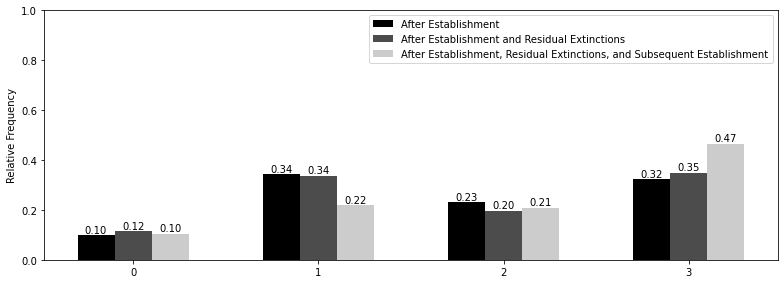

In [8]:
# Plot the relative frequency of motifs through each stage of core motif development for assembly model with AF

a = len(spc_spc_af1) / len(est_species_af1)
b = len(spc_gen_af1) / len(est_species_af1)
c = len(gen_spc_af1) / len(est_species_af1)
d = len(gen_gen_af1) / len(est_species_af1)

e = len(spc_spc_af1_ext) / len(est_species_af1)
f = len(spc_gen_af1_ext) / len(est_species_af1)
g = len(gen_spc_af1_ext) / len(est_species_af1)
h = len(gen_gen_af1_ext) / len(est_species_af1)

i = len(spc_spc_af1_est) / len(est_species_af1)
j = len(spc_gen_af1_est) / len(est_species_af1)
k = len(gen_spc_af1_est) / len(est_species_af1)
l = len(gen_gen_af1_est) / len(est_species_af1)

# plot
labels = ['Spc-Gen-Spc', 'Spc-Gen-Gen', 'Gen-Gen-Spc', 'Gen-Gen-Gen']
data = [a, b, c, d]
data_ext = [e, f, g, h]
data_est = [i, j, k, l]

x = np.arange(len(labels))  # the label locations
width = 0.20

fig, ax = plt.subplots(figsize=(11, 4))
data_fig = ax.bar(x - (width), data, width, label='After Establishment', color = 'black')
ax.bar_label(data_fig, fmt='%0.2f')
data_ext_fig = ax.bar(x, data_ext, width, label='After Establishment and Residual Extinctions', color = 'black', alpha = 0.7)
ax.bar_label(data_ext_fig, fmt='%0.2f')
data_est_fig = ax.bar(x + (width), data_est, width, label='After Establishment, Residual Extinctions, and Subsequent Establishment', color = 'black', alpha = 0.2)
ax.bar_label(data_est_fig, fmt='%0.2f')

ax.set_ylabel('Relative Frequency')
ax.set_xticks(x)
ax.legend()

fig.tight_layout()
plt.ylim(0, 1)
plt.show()

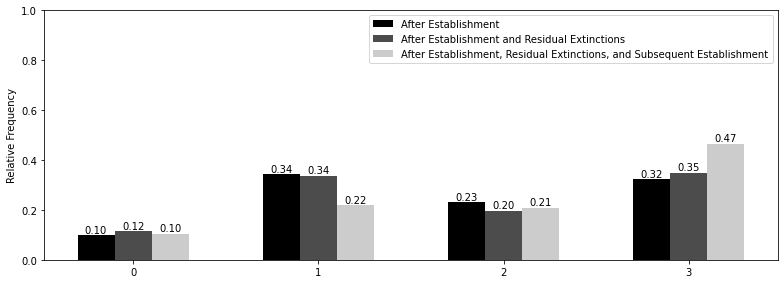

In [9]:
# Plot the relative frequency of motifs through each stage of core motif development for assembly model without AF

a = len(spc_spc_af0) / len(est_species_af0)
b = len(spc_gen_af0) / len(est_species_af0)
c = len(gen_spc_af0) / len(est_species_af0)
d = len(gen_gen_af0) / len(est_species_af0)

e = len(spc_spc_af0_ext) / len(est_species_af0)
f = len(spc_gen_af0_ext) / len(est_species_af0)
g = len(gen_spc_af0_ext) / len(est_species_af0)
h = len(gen_gen_af0_ext) / len(est_species_af0)

i = len(spc_spc_af0_est) / len(est_species_af0)
j = len(spc_gen_af0_est) / len(est_species_af0)
k = len(gen_spc_af0_est) / len(est_species_af0)
l = len(gen_gen_af0_est) / len(est_species_af0)

# plot
labels = ['Spc-Gen-Spc', 'Spc-Gen-Gen', 'Gen-Gen-Spc', 'Gen-Gen-Gen']
data = [a, b, c, d]
data_ext = [e, f, g, h]
data_est = [i, j, k, l]

x = np.arange(len(labels))  # the label locations
width = 0.20

fig, ax = plt.subplots(figsize=(11, 4))
data_fig = ax.bar(x - (width), data, width, label='After Establishment', color = 'black')
ax.bar_label(data_fig, fmt='%0.2f')
data_ext_fig = ax.bar(x, data_ext, width, label='After Establishment and Residual Extinctions', color = 'black', alpha = 0.7)
ax.bar_label(data_ext_fig, fmt='%0.2f')
data_est_fig = ax.bar(x + (width), data_est, width, label='After Establishment, Residual Extinctions, and Subsequent Establishment', color = 'black', alpha = 0.2)
ax.bar_label(data_est_fig, fmt='%0.2f')

ax.set_ylabel('Relative Frequency')
ax.set_xticks(x)
ax.legend()

fig.tight_layout()
plt.ylim(0, 1)
plt.show()

In [10]:
data_table_af0 = pd.read_csv('%s/results/%s/%s/data_table.csv' % (getcwd(), date, dir_AF0))
data_table_af1 = pd.read_csv('%s/results/%s/%s/data_table.csv' % (getcwd(), date, dir_AF1))

# analyze final networks produced in each simulation
af0_data = data_table_af0[data_table_af0.TimeStep == 100000]
af1_data = data_table_af1[data_table_af1.TimeStep == 100000]

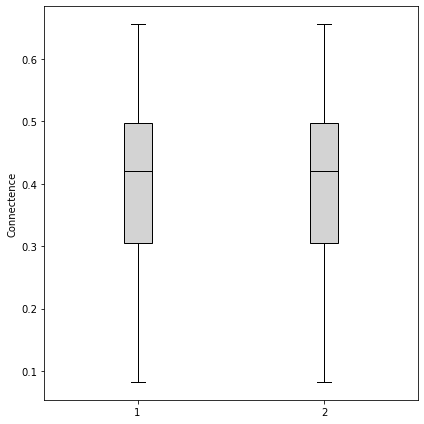

0.3975909413283257
0.3975909413283257
Ttest_relResult(statistic=nan, pvalue=nan)


In [11]:
fig, ax = plt.subplots(figsize=(6, 6))

bplot = ax.boxplot(x = [af0_data.Connectence, af1_data.Connectence], patch_artist = True)
ax.set_ylabel('Connectence')
colors = ['lightgrey', 'lightgrey', 'lightgrey']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    
for median in bplot['medians']:
    median.set_color('black')
    
fig.tight_layout()
#plt.ylim(0, 4)
plt.show()

print(np.mean(af0_data.Connectence))
print(np.mean(af1_data.Connectence))
print(ttest_rel(af0_data.Connectence, af1_data.Connectence, alternative = 'less'))

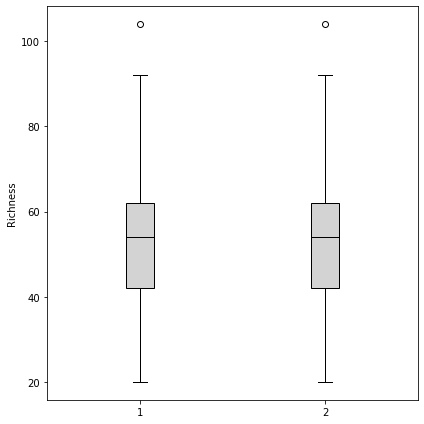

53.70247933884298
53.70247933884298
Ttest_relResult(statistic=nan, pvalue=nan)


In [12]:
fig, ax = plt.subplots(figsize=(6, 6))

bplot = ax.boxplot(x = [af0_data.NetworkSize, af1_data.NetworkSize], patch_artist = True)
ax.set_ylabel('Richness')
colors = ['lightgrey', 'lightgrey', 'lightgrey']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    
for median in bplot['medians']:
    median.set_color('black')
    
fig.tight_layout()
#plt.ylim(0, 4)
plt.show()

print(np.mean(af0_data.NetworkSize))
print(np.mean(af1_data.NetworkSize))
print(ttest_rel(af0_data.NetworkSize, af1_data.NetworkSize, alternative = 'less'))

AttributeError: 'DataFrame' object has no attribute 'NODFc'

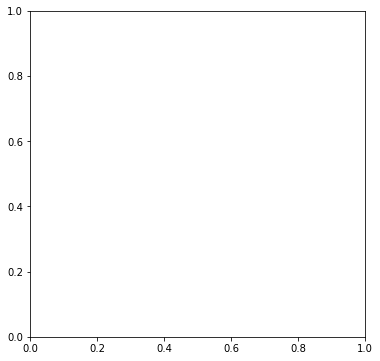

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))

bplot = ax.boxplot(x = [af0_data.NODFc, af1_data.NODFc], patch_artist = True)
ax.set_ylabel('Nestedness')
colors = ['lightgrey', 'lightgrey', 'lightgrey']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    
for median in bplot['medians']:
    median.set_color('black')
    
fig.tight_layout()
#plt.ylim(0, 4)
plt.show()

print(np.mean(af0_data.NODFc))
print(np.mean(af1_data.NODFc))
print(ttest_rel(af0_data.NODFc, af1_data.NODFc, alternative = 'less'))

##### 